In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

In [54]:
data = pd.read_excel('3_Q2_Dataset.xlsx')
#data.head()
data = data.drop('Instance', axis=1)
print(data)

       X     Y
0    1.0   1.0
1    0.0   1.0
2    1.0   0.0
3   11.0  12.0
4   11.0  13.0
5   13.0  13.0
6   12.0   8.5
7   13.0   8.0
8   13.0   9.0
9   13.0   7.0
10  11.0   7.0
11   8.0   2.0
12   9.0   2.0
13  10.0   1.0
14   7.0  13.0
15   5.0   9.0
16  16.0  16.0
17  11.5   8.0
18  13.0  10.0
19  12.0  13.0
20  14.0  12.5
21  14.5  11.5
22  15.0  10.5
23  15.0   9.5
24  12.0   9.5
25  10.5  11.0
26  10.0  10.5
27   9.0   3.0
28   9.0   4.0
29   9.0   5.0


In [55]:
optics_model = OPTICS(min_samples = 2, p=2, max_eps = 2.0) 
  
# Training the model 
optics_model.fit(data) 

OPTICS(max_eps=2.0, min_samples=2)

In [56]:
# below function extracts labels
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 1.2) 

core_distances = optics_model.core_distances_
reachability = optics_model.reachability_#[optics_model.ordering_]
ordering = optics_model.ordering_
data2 = pd.read_excel('3_Q2_Dataset.xlsx')
r1 = pd.DataFrame(reachability)
data2=pd.concat([data2, r1], axis=1)

print(ordering)
print(data2)

[ 0  1  2  3  4 19  5 20 21 22 23 25 26  6 17 24  7  8  9 18 10 11 12 27
 28 29 13 14 15 16]
       Instance     X     Y         0
0    Instance 1   1.0   1.0       inf
1    Instance 2   0.0   1.0  1.000000
2    Instance 3   1.0   0.0  1.000000
3    Instance 4  11.0  12.0       inf
4    Instance 5  11.0  13.0  1.000000
5    Instance 6  13.0  13.0  1.000000
6    Instance 7  12.0   8.5       inf
7    Instance 8  13.0   8.0  1.118034
8    Instance 9  13.0   9.0  1.000000
9   Instance 10  13.0   7.0  1.000000
10  Instance 11  11.0   7.0  1.118034
11  Instance 12   8.0   2.0       inf
12  Instance 13   9.0   2.0  1.000000
13  Instance 14  10.0   1.0  1.414214
14  Instance 15   7.0  13.0       inf
15  Instance 16   5.0   9.0       inf
16  Instance 17  16.0  16.0       inf
17  Instance 18  11.5   8.0  0.707107
18  Instance 19  13.0  10.0  1.000000
19  Instance 20  12.0  13.0  1.000000
20  Instance 21  14.0  12.5  1.118034
21  Instance 22  14.5  11.5  1.118034
22  Instance 23  15.0  10.5  1.11

In [57]:
space = np.arange(len(data))

Text(0.5, 1.0, 'DBSCAN clustering with eps = 1.2')

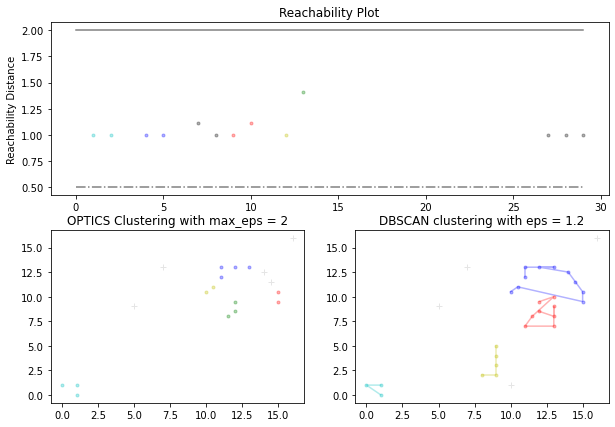

In [58]:
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 2) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 

# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = data[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(data.iloc[optics_model.labels_ == -1, 0], 
        data.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering with max_eps = 2') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = data[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')

ax3.plot(data.iloc[labels1 == -1, 0], 
        data.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 1.2')